<a href="https://colab.research.google.com/github/trivenisuresh722/ESD/blob/main/1_mask_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training CNN model to predict Mask and No Mask  (Images)
 
# Install Packages

In [3]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8 MB 25 kB/s 
     |████████████████████████████████| 3.8 MB 39.3 MB/s 
     |████████████████████████████████| 448 kB 57.0 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d7ace6d2b117b3c406bd0d761b1fec755736f0ca89e6487a4b0bf0a810cc5a4a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [4]:
pip install keras==2.3.1

     |████████████████████████████████| 377 kB 4.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


# Training model

In [5]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


# for accuracy and loss graph

In [6]:
import matplotlib.pyplot as plt

In [7]:
import tensorflow

In [8]:
print(keras.__version__)
print(tensorflow.__version__)

2.3.1
2.1.0


In [9]:
train_data_path = "/content/drive/MyDrive/DATASET/dataset/train"

In [10]:
validation_data_path = "/content/drive/MyDrive/DATASET/dataset/valid"

In [12]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [13]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 

Found 3649 images belonging to 2 classes.


In [14]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [15]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


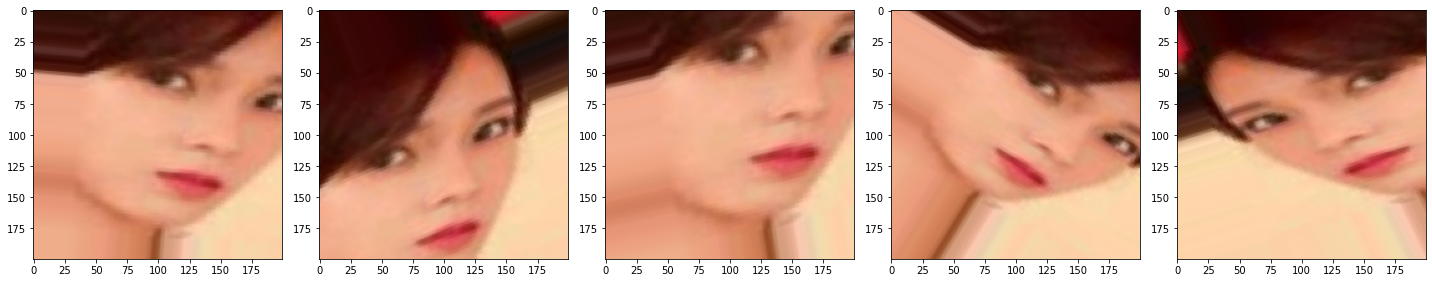

In [16]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [22]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/DATASET/model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [23]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
 
 
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
 

In [19]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25
 

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/29 [>.............................] - ETA: 23:41 - loss: 0.6901 - accuracy: 0.5469

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 2/29 [=>............................] - ETA: 21:18 - loss: 0.6906 - accuracy: 0.5703

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/29 [==>...........................] - ETA: 19:38 - loss: 0.6864 - accuracy: 0.5885

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/29 [===>..........................] - ETA: 18:13 - loss: 0.6799 - accuracy: 0.5918

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/29 [====>.........................] - ETA: 17:32 - loss: 0.6751 - accuracy: 0.5984

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/29 [=====>........................] - ETA: 16:49 - loss: 0.6775 - accuracy: 0.5911

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/29 [======>.......................] - ETA: 16:04 - loss: 0.6679 - accuracy: 0.6027

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/29 [=======>......................] - ETA: 15:21 - loss: 0.6610 - accuracy: 0.6025

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/29 [========>.....................] - ETA: 14:40 - loss: 0.6517 - accuracy: 0.6163

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/29 [=========>....................] - ETA: 13:50 - loss: 0.6449 - accuracy: 0.6266

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/29 [==========>...................] - ETA: 12:57 - loss: 0.6320 - accuracy: 0.6470

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/29 [===========>..................] - ETA: 12:21 - loss: 0.6208 - accuracy: 0.6556

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/29 [=============>................] - ETA: 10:29 - loss: 0.5872 - accuracy: 0.6796

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/29 [===============>..............] - ETA: 8:42 - loss: 0.5678 - accuracy: 0.7008

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/29 [================>.............] - ETA: 8:02 - loss: 0.5639 - accuracy: 0.7052

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/29 [=================>............] - ETA: 7:30 - loss: 0.5515 - accuracy: 0.7149

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/29 [==================>...........] - ETA: 6:51 - loss: 0.5462 - accuracy: 0.7218

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/29 [===================>..........] - ETA: 6:10 - loss: 0.5364 - accuracy: 0.7269

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/29 [====================>.........] - ETA: 5:30 - loss: 0.5263 - accuracy: 0.7337

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/29 [=====================>........] - ETA: 4:49 - loss: 0.5174 - accuracy: 0.7403

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/29 [======================>.......] - ETA: 4:08 - loss: 0.5110 - accuracy: 0.7463

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/29 [=======================>......] - ETA: 3:27 - loss: 0.5055 - accuracy: 0.7498

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/29 [========================>.....] - ETA: 2:47 - loss: 0.4979 - accuracy: 0.7539

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/29 [=========================>....] - ETA: 2:05 - loss: 0.4931 - accuracy: 0.7574

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/29 [==========================>...] - ETA: 1:23 - loss: 0.4883 - accuracy: 0.7610

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/29 [===========================>..] - ETA: 41s - loss: 0.4804 - accuracy: 0.7657 

/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/29 [==============================] - 1235s 43s/step - loss: 0.4742 - accuracy: 0.7698 - val_loss: 0.1528 - val_accuracy: 0.9206

Epoch 00001: val_accuracy improved from -inf to 0.92060, saving model to /content/drive/MyDrive/DATASET/model/model.h5
Epoch 2/50
29/29 [==============================] - 209s 7s/step - loss: 0.3146 - accuracy: 0.8874 - val_loss: 0.1114 - val_accuracy: 0.9392

Epoch 00002: val_accuracy improved from 0.92060 to 0.93921, saving model to /content/drive/MyDrive/DATASET/model/model.h5
Epoch 3/50
29/29 [==============================] - 211s 7s/step - loss: 0.2921 - accuracy: 0.8939 - val_loss: 0.2219 - val_accuracy: 0.9144

Epoch 00003: val_accuracy did not improve from 0.93921
Epoch 4/50
29/29 [==============================] - 209s 7s/step - loss: 0.3021 - accuracy: 0.8907 - val_loss: 0.0809 - val_accuracy: 0.9504

Epoch 00004: val_accuracy improved from 0.93921 to 0.95037, saving model to /content/drive/MyDrive/DATASET/model/model.h5
Epoch 5/50
29/29 [=====

In [20]:
cnn_model.save('/content/drive/MyDrive/DATASET/model/model_last.h5')
 

In [24]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history['loss'], label='train loss')
plt.plot(cnn_model.history['val_loss'], label='val loss')
plt.legend()   
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history['accuracy'], label='train acc')
plt.plot(cnn_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

AttributeError: ignored